# Etude  Virus Corona

In [1]:
import pandas as pd

df = pd.read_html('https://www.worldometers.info/coronavirus/#countries')[0]


In [2]:
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80849,+25,3199.0,10.0,66931.0,10719,3226.0,56.2
1,Italy,21157,NaN,1441.0,NaN,1966.0,17750,1518.0,349.9
2,Iran,13938,"+1,209",724.0,113.0,4590.0,8624,NaN,165.9
3,S. Korea,8162,+76,75.0,3.0,834.0,7253,59.0,159.2
4,Spain,7753,"+1,362",291.0,95.0,517.0,6945,272.0,165.8
5,Germany,5620,"+1,021",11.0,2.0,46.0,5563,2.0,67.1
6,France,4499,+30,91.0,NaN,12.0,4396,300.0,68.9
7,USA,3127,+184,62.0,5.0,56.0,3009,10.0,9.4
8,Switzerland,2217,+842,14.0,1.0,4.0,2199,NaN,256.2
9,UK,1372,+232,35.0,14.0,18.0,1319,20.0,20.2


In [21]:
new_cols = df.columns.values
new_cols[0] = 'Countries'
df.columns = new_cols

df['DeathRate'] = df['TotalDeaths']/df['TotalCases']
# df['DeathRate'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['DeathRate']], index = df.index)
#df['DeathRate'] = pd.Series(["{0:.2f}".format(val * 100) for val in df['DeathRate']], index = df.index)
df

,Countries,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,rate,DeathRate
0,China,80849,+25,3199.0,10.0,66931.0,10719,3226.0,56.2,3.96%,0.039568
1,Italy,21157,NaN,1441.0,NaN,1966.0,17750,1518.0,349.9,6.81%,0.068110
2,Iran,13938,"+1,209",724.0,113.0,4590.0,8624,NaN,165.9,5.19%,0.051944
3,S. Korea,8162,+76,75.0,3.0,834.0,7253,59.0,159.2,0.92%,0.009189
4,Spain,7753,"+1,362",291.0,95.0,517.0,6945,272.0,165.8,3.75%,0.037534
5,Germany,5620,"+1,021",11.0,2.0,46.0,5563,2.0,67.1,0.20%,0.001957
6,France,4499,+30,91.0,NaN,12.0,4396,300.0,68.9,2.02%,0.020227
7,USA,3127,+184,62.0,5.0,56.0,3009,10.0,9.4,1.98%,0.019827
8,Switzerland,2217,+842,14.0,1.0,4.0,2199,NaN,256.2,0.63%,0.006315
9,UK,1372,+232,35.0,14.0,18.0,1319,20.0,20.2,2.55%,0.025510


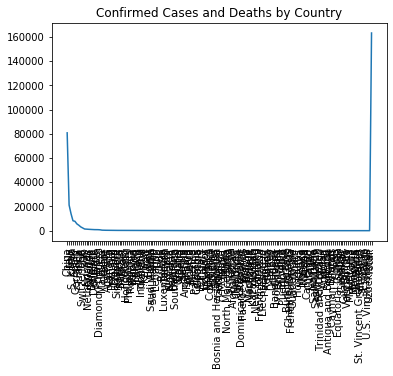

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title('Confirmed Cases and Deaths by Country')
plt.xticks(rotation=90)
plt.plot(df.Countries, df.TotalCases)


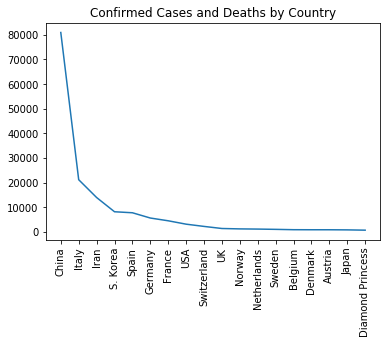

In [28]:
top50 = df['TotalCases'] > 500
nototal = df['Countries'] != 'Total:'

plt.figure()
plt.title('Confirmed Cases and Deaths by Country')
plt.xticks(rotation=90)
plt.plot(df[top50 & nototal].Countries, df[top50 & nototal].TotalCases)


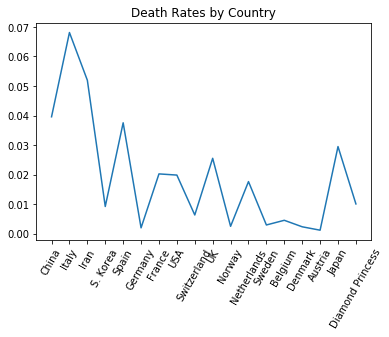

In [26]:
plt.figure()
plt.title('Death Rates by Country')
plt.xticks(rotation=60)
plt.plot(df[top50 & nototal].Countries, df[top50 & nototal].DeathRate)

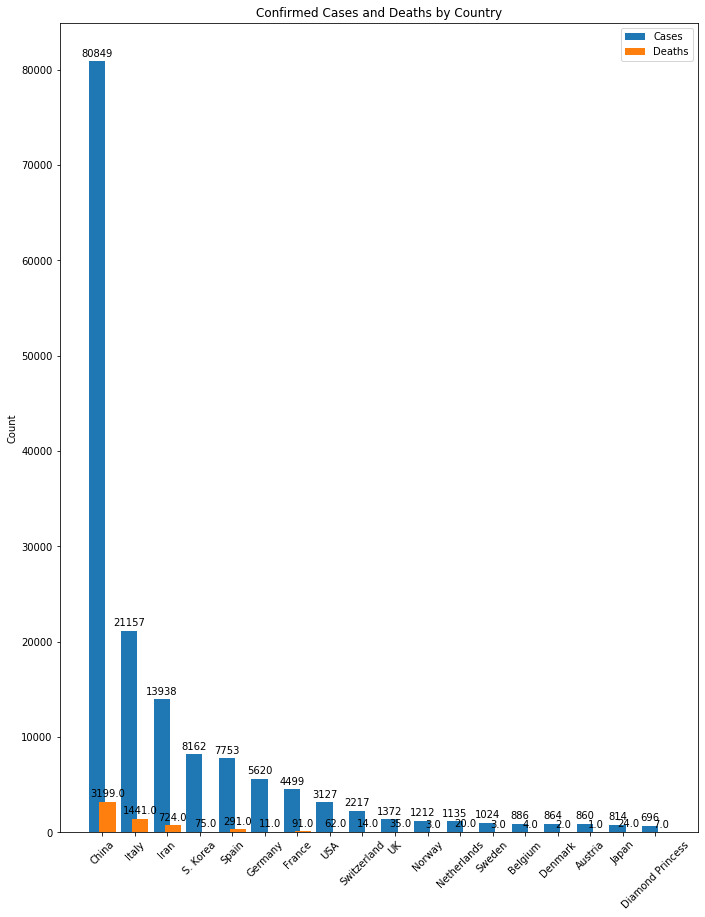

In [18]:
import numpy as np

x = np.arange(len(df[top50 & nototal].Countries))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(10,12))
rects1 = ax.bar(x - width/3, df[top50 & nototal].TotalCases, width, label='Cases')
rects2 = ax.bar(x + width/3, df[top50 & nototal].TotalDeaths, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Confirmed Cases and Deaths by Country')
ax.set_xticks(x)
ax.set_xticklabels(df[top50 & nototal].Countries)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.xticks(rotation=45)

plt.show()

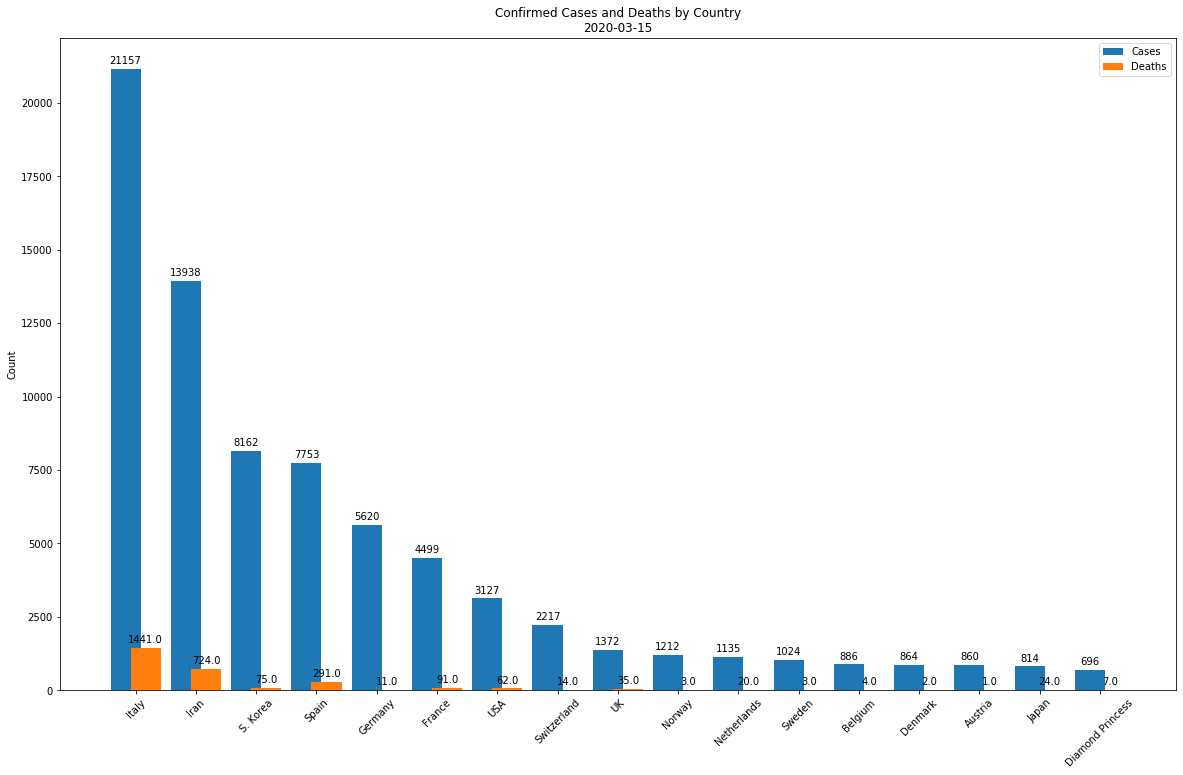

In [19]:
from datetime import date
today = date.today()

nochina = df['Countries'] != 'China'

x = np.arange(len(df[top50 & nototal & nochina].Countries))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x - width/3, df[top50 & nototal & nochina].TotalCases, width, label='Cases')
rects2 = ax.bar(x + width/3, df[top50 & nototal & nochina].TotalDeaths, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Confirmed Cases and Deaths by Country\n{}'.format(today))
ax.set_xticks(x)
ax.set_xticklabels(df[top50 & nototal & nochina].Countries)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


plt.xticks(rotation=45)

plt.show()